In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("data/Social_Network_Ads.csv")

In [14]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [15]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [16]:
data.shape

(400, 5)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# extract sample data 

In [18]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [19]:
data.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
51,15764195,Female,18,44000,0
59,15789109,Female,32,117000,0
294,15566689,Female,35,57000,0
338,15810800,Female,38,55000,0
340,15588080,Female,53,104000,1
369,15624755,Female,54,26000,1
200,15628523,Male,35,39000,0
142,15617134,Male,35,59000,0
131,15801247,Male,33,31000,0
296,15673539,Male,42,73000,1


# Datatype conversion

In [20]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [21]:
data["Purchased"] = data["Purchased"].astype("category")
data["Gender"] = data["Gender"].astype("category")

In [22]:
data.dtypes

User ID               int64
Gender             category
Age                   int64
EstimatedSalary       int64
Purchased          category
dtype: object

# Finding Missing values

In [25]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# dropped unwanted columns

In [26]:
data.drop(["User ID"],axis=1,inplace=True)

In [27]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


# univariant analysis

In [38]:
import seaborn as sns
import plotly.express as px

### Analysis for Gender column

In [39]:
data["Gender"].unique()

['Male', 'Female']
Categories (2, object): ['Male', 'Female']

In [40]:
gender_value_count = data["Gender"].value_counts()
gender_value_count

Female    204
Male      196
Name: Gender, dtype: int64

In [41]:
px.bar(x=gender_value_count.index,y=gender_value_count)

<AxesSubplot:xlabel='Gender', ylabel='count'>

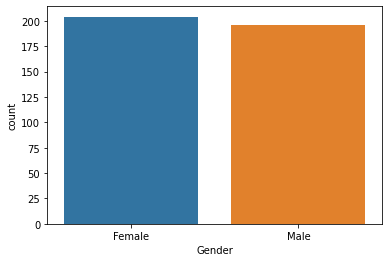

In [42]:
sns.countplot(data["Gender"])

### Analysis for purchased column

In [43]:
data["Purchased"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [52]:
temp = data["Purchased"].value_counts()
temp

0    257
1    143
Name: Purchased, dtype: int64

In [53]:
(temp/ data.shape[0]) * 100

0    64.25
1    35.75
Name: Purchased, dtype: float64

/home/milan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Purchased', ylabel='count'>

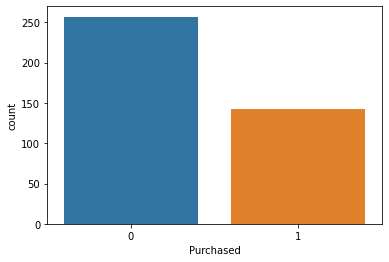

In [44]:
sns.countplot(data["Purchased"])

- 65% (257/400) of experiments candidate didnt not purchase online 
- only 35% (143/400) of experiments candidate puchased online 

# continous data

In [55]:
data["Age"].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [56]:
px.histogram(data["Age"])

In [57]:
px.box(data["Age"])

In [59]:
data["EstimatedSalary"].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [60]:
px.histogram(data["EstimatedSalary"])

In [62]:
px.box(data["EstimatedSalary"])

# mulit variant analysis

In [63]:
# Gender vs purchased

In [90]:
data["Gender"] =data["Gender"].astype(str)
data["Purchased"] =data["Purchased"].astype(str)
two_fre_g_p = pd.crosstab(data["Gender"],data["Purchased"])
two_fre_g_p

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


<AxesSubplot:xlabel='Purchased', ylabel='Gender'>

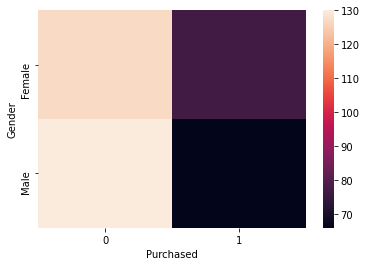

In [91]:
sns.heatmap(two_fre_g_p)

In [102]:
two_fre_g_p

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [107]:
temp_bar_data = two_fre_g_p.reset_index().melt(id_vars="Gender")

In [108]:
temp_bar_data

,Gender,Purchased,value
0,Female,0,127
1,Male,0,130
2,Female,1,77
3,Male,1,66


<AxesSubplot:xlabel='Purchased', ylabel='value'>

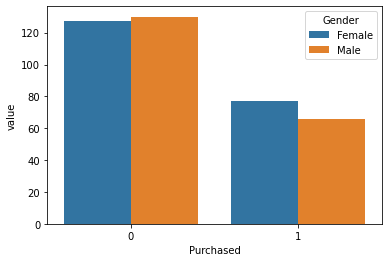

In [111]:
sns.barplot(x="Purchased",y="value",hue="Gender",data=temp_bar_data)

# Which age group purhcased online alot

In [112]:
px.histogram(data,x="Age",color="Purchased")

/home/milan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

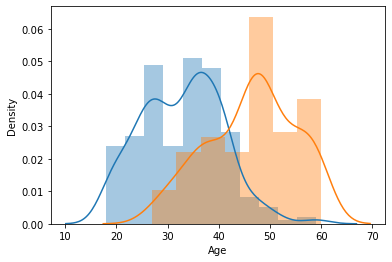

In [116]:
sns.distplot(data.loc[data["Purchased"]=="0","Age"])
sns.distplot(data.loc[data["Purchased"]=="1","Age"])

/home/milan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/milan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

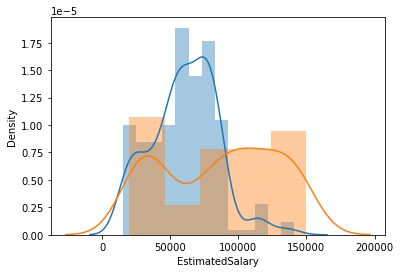

In [117]:
sns.distplot(data.loc[data["Purchased"]=="0","EstimatedSalary"])
sns.distplot(data.loc[data["Purchased"]=="1","EstimatedSalary"])

In [122]:
px.histogram(data,"EstimatedSalary",color="Purchased")

In [124]:
 px.scatter(data,x="Age",y="EstimatedSalary",color="Purchased")

- 20-35 => Not purchased 
- 35-45 & less salary => not purchased
- 35-45 & high salary => purchased
- 45-above =>purchased 